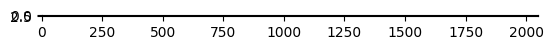

In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Load the npy file
data = np.load('Fashion-How_2024_subtask4/data/img_feats/BG-002.npy')

# Display the data using matplotlib
plt.imshow(data)
plt.show()

In [ ]:
from transformers import LlavaNextForConditionalGeneration,LlavaNextProcessor
import torch

model = LlavaNextForConditionalGeneration.from_pretrained(
  'Bllossom/llama-3.1-Korean-Bllossom-Vision-8B',
  torch_dtype=torch.bfloat16,
  device_map='auto'
)
processor = LlavaNextProcessor.from_pretrained('Bllossom/llama-3.1-Korean-Bllossom-Vision-8B')

with torch.no_grad():

    PROMPT=\
    """You are a versatile AI assistant named Bllava, capable of both understanding and generating text as well as interpreting and analyzing images. Your role is to kindly and effectively answer the user’s questions, whether they are about text or images, and provide appropriate and helpful responses to all types of queries.
    
    당신은 텍스트를 이해하고 생성하는 것뿐만 아니라 이미지를 해석하고 분석할 수 있는 다재다능한 AI 어시스턴트 블라바입니다. 사용자의 질문이 텍스트에 관한 것이든 이미지에 관한 것이든 친절하고 효과적으로 답변하며, 모든 유형의 질의에 대해 적절하고 유용한 응답을 제공하는 것이 당신의 역할입니다."""

    instruction = '자연어처리 15주 분량 커리큘럼을 짜줘'
    
    messages = [
        {'role': 'system', 'content': f"{PROMPT}"},
        {'role': 'user', 'content': f"{instruction}"}
    ]

    chat_messages = processor.tokenizer.apply_chat_template(
        messages,
        tokenize=True,
        add_generation_prompt=True,
        return_tensors='pt',
    )
    
    bos_token = processor.tokenizer.bos_token_id
    chat_messages = torch.cat([torch.tensor([[bos_token]]),chat_messages],dim=-1).to(model.device)
    

    output = model.generate(
        input_ids = chat_messages,
        use_cache=False,
        max_new_tokens=2048,
        top_p=0.9,
        temperature=0.6,
        do_sample=True,
    )

    print(processor.tokenizer.decode(output[0]))


In [ ]:
from PIL import Image
from transformers import LlavaNextForConditionalGeneration,LlavaNextProcessor
import torch

model = LlavaNextForConditionalGeneration.from_pretrained(
  'Bllossom/llama-3.1-Korean-Bllossom-Vision-8B',
  torch_dtype=torch.bfloat16,
  device_map='auto'
)
processor = LlavaNextProcessor.from_pretrained('Bllossom/llama-3.1-Korean-Bllossom-Vision-8B')

image = Image.open('[IMAGE_PATH]').convert('RGB')

PROMPT=\
"""You are a versatile AI assistant named Bllava, capable of both understanding and generating text as well as interpreting and analyzing images. Your role is to kindly and effectively answer the user’s questions, whether they are about text or images, and provide appropriate and helpful responses to all types of queries.

당신은 텍스트를 이해하고 생성하는 것뿐만 아니라 이미지를 해석하고 분석할 수 있는 다재다능한 AI 어시스턴트 블라바입니다. 사용자의 질문이 텍스트에 관한 것이든 이미지에 관한 것이든 친절하고 효과적으로 답변하며, 모든 유형의 질의에 대해 적절하고 유용한 응답을 제공하는 것이 당신의 역할입니다."""


instruction = '이미지에 대해서 설명해주세요.'
messages = [
    {'role': 'system', 'content': f"{PROMPT}"},
    {'role': 'user', 'content': f"<image>\n{instruction}"}
]

chat_messages = processor.tokenizer.apply_chat_template(
  messages,
  tokenize=False,
  add_generation_prompt=True
).to(model.device)

inputs = processor(
    chat_messages,
    image,
    return_tensors='pt',
)

output = model.generate(
    **inputs,
    max_new_tokens=1024,
    )

print(processor.tokenizer.decode(output[0]))
